# **Assignment 2**
# Developed by Biljana Jonoska Stojkova, PhD
# Revised by Johnson Chen

**Insert here your name:** Wei Ning Chan

**Your student ID:** 23385923

**Total Marks earned:** 

**Score for Full Marks:**  70

**Bonus marks:** 20


### Assignment Outline

In this assignment series, you will get the training needed to complete the final report. With each new assignment you will master different aspects of the final report sections, thus filling different pieces of the puzzle with each assignment. 

In assignemnt 1, you formulated the research questions, described the data set, formulated the statsitical problem and determined the approrpate graph. In this Assignment, you will determine the appropriate statsitical methodologies, assess their assumptions, explain the methods and identify potential limitations from the chosen methodologies.


In this assignment we will continue practicing writing the following sections of a statistical report:



- Methodology -  appropriate statistical methods

- Run the chosen methods analysis, assess the assumptions
  
- Discussion - Limitations from the chosen methodologies with respect to the data set, expected violations of the assumptions.




### 1. Run approprate methods analysis, assess the assumptions

In [1]:
# run this code
library(tidyverse)
ds_ames = read_csv("../data/ames.csv")
colnames(ds_ames)
ds_ames=ds_ames[,c("Order","Sale_Price","Land_Slope","Neighborhood")]

ds_ames = ds_ames %>% mutate(Land_Slope_Descr= case_when(Land_Slope=="Gtl" ~	"Gentle slope",
                                                         Land_Slope=="Mod" ~	"Moderate Slope",	
                                                         Land_Slope=="Sev" ~	"Severe Slope",TRUE~Land_Slope))


head(ds_ames)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 2925 Columns: 75
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (40): MS_SubClass, MS_Zoning, Street, Alley, Lot_Shape, Land_Contour, Ut...
dbl (35): Order, Lot_Frontage, Lot_Area, Year_Built, Year_Remod_Add, Mas_Vnr...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "Order"              "MS_SubClass"        "MS_Zoning"         
 [4] "Lot_Frontage"       "Lot_Area"           "Street"            
 [7] "Alley"              "Lot_Shape"          "Land_Contour"      
[10] "Utilities"          "Lot_Config"         "Land_Slope"        
[13] "Neighborhood"       "Condition_1"        "Condition_2"       
[16] "Bldg_Type"          "House_Style"        "Overall_Cond"      
[19] "Year_Built"         "Year_Remod_Add"     "Roof_Style"        
[22] "Roof_Matl"          "Exterior_1st"       "Exterior_2nd"      
[25] "Mas_Vnr_Type"       "Mas_Vnr_Area"       "Exter_Cond"        
[28] "Foundation"         "Bsmt_Cond"          "Bsmt_Exposure"     
[31] "BsmtFin_Type_1"     "BsmtFin_SF_1"       "BsmtFin_Type_2"    
[34] "BsmtFin_SF_2"       "Bsmt_Unf_SF"        "Total_Bsmt_SF"     
[37] "Heating"            "Heating_QC"         "Central_Air"       
[40] "Electrical"         "First_Flr_SF"       "Second_Flr_SF"     
[43] "Gr_Liv_Area"        "Bsmt_Full_Bath"     "Bsmt_Half_Bath"    
[46] "Full_Bath"          "Half_Bath"          "Bedroom_AbvGr"     
[49] "Kitchen_AbvGr"      "TotRms_AbvGrd"      "Functional"        
[52] "Fireplaces"         "Garage_Type"        "Garage_Finish"     
[55] "Garage_Cars"        "Garage_Area"        "Garage_Cond"       
[58] "Paved_Drive"        "Wood_Deck_SF"       "Open_Porch_SF"     
[61] "Enclosed_Porch"     "Three_season_porch" "Screen_Porch"      
[64] "Pool_Area"          "Pool_QC"            "Fence"             
[67] "Misc_Feature"       "Misc_Val"           "Mo_Sold"           
[70] "Year_Sold"          "Sale_Type"          "Sale_Condition"    
[73] "Sale_Price"         "Longitude"          "Latitude"

Order Sale_Price Land_Slope Neighborhood Land_Slope_Descr
1 1     215000     Gtl        North_Ames   Gentle slope    
2 2     105000     Gtl        North_Ames   Gentle slope    
3 3     172000     Gtl        North_Ames   Gentle slope    
4 4     244000     Gtl        North_Ames   Gentle slope    
5 5     189900     Gtl        Gilbert      Gentle slope    
6 6     195500     Gtl        Gilbert      Gentle slope

#### We will now assess which statistical method— One-way ANOVA or Linear Regression Model— is more appropriate to answer the research question:

#### **Assumptions of One-Way ANOVA:**

Using the results outputs below, assess each of these assumptions. Write **Severly Violated, Violated, Valid or Irrelevant:**

(3 points each, total 12 points)


Land_Slope_Descr n   
1 Gentle slope     2784
2 Moderate Slope    125
3 Severe Slope       16

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


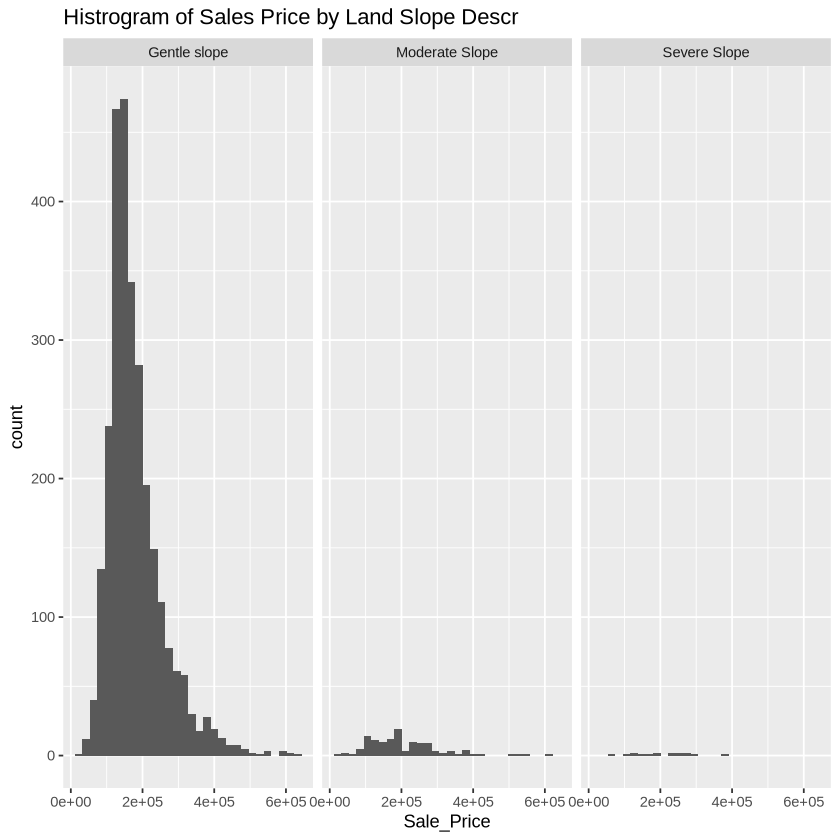

In [2]:
# One-Way ANOVA 
m1=aov(Sale_Price~Land_Slope_Descr, ds_ames)
# Check for ANOVA assumptions
# check for the equal variance within the comparison groups
# by chcking the sample sizes within comparison groups
ds_ames %>% count(Land_Slope_Descr)
# check for normality of Sales Price for each group
ds_ames %>% ggplot(aes(x=Sale_Price)) + geom_histogram()+facet_wrap(~Land_Slope_Descr)+labs(title="Histrogram of Sales Price by Land Slope Descr")

1A. Comparison groups are two or more un-correlated samples.

Answer: Valid. Since Land Slope Descr is a categorical variable (categories: gentle slope, moderate slope and severe slope) with distinct groups, I assume that there are independent of each other as each house belong to only one group, thus the comparison groups are uncorrelated samples. 

1B. The outcome variable of interest is normally distributed within each comparison group.

Answer: Violated. From the histogram of Sales Price by Land Slope Descr, I have observed that the gentle and moderate slope are skewed to the right, and the histograms are not bell-shape or symmetrical. Thus, it is not normally distributed within each comparison group. 

1C. The outcome variable of interest has equal variance within each of the two comparison groups (related to equal sample size within each group).


Answer: Severely Violated. Since the sample size of each group is significantly different/unequal (i.e. Gentle slope: 2784, Moderate Slope: 125, 
Severe Slope: 16	), variability is much more significant in gentle slope compared to moderate and severe slope. Thus, there is unequal variance within each of the two comparison groups.



1D. Independent observations: each comparison group represents a simple random sample from their respective populations and are independent of each other.



Answer: Valid. Since the dataset is a complete census of property sales, each observation is independent as long as there is no temporal or spatial dependency. Each observation is independent as they are all unique houses. However, it is not a simple random sample as it is a complete census of property sales from 2006 to 2010, rather than a subset of the data. A simple random sample would involve selecting a subset of individuals from the population in a way that each individual has an equal chance of being included in the sample. However in this case, all data is taken from this study period. I still consider it as valid as they are indeed independent observations.

[1] "Interpret the results from the linear model:"



Call:
lm(formula = Sale_Price ~ Land_Slope_Descr, data = ds_ames)

Residuals:
    Min      1Q  Median      3Q     Max 
-191754  -50209  -19159   33841  445841 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      179159       1486 120.600  < 2e-16 ***
Land_Slope_DescrModerate Slope    25695       7166   3.585 0.000342 ***
Land_Slope_DescrSevere Slope      28211      19652   1.436 0.151242    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 78380 on 2922 degrees of freedom
Multiple R-squared:  0.005025,	Adjusted R-squared:  0.004344 
F-statistic: 7.379 on 2 and 2922 DF,  p-value: 0.000636


[1] "Confidence intervals of the linear model estimates:"


2.5 %     97.5 %   
(Intercept)                    176246.33 182072.07
Land_Slope_DescrModerate Slope  11642.59  39746.58
Land_Slope_DescrSevere Slope   -10322.22  66745.07

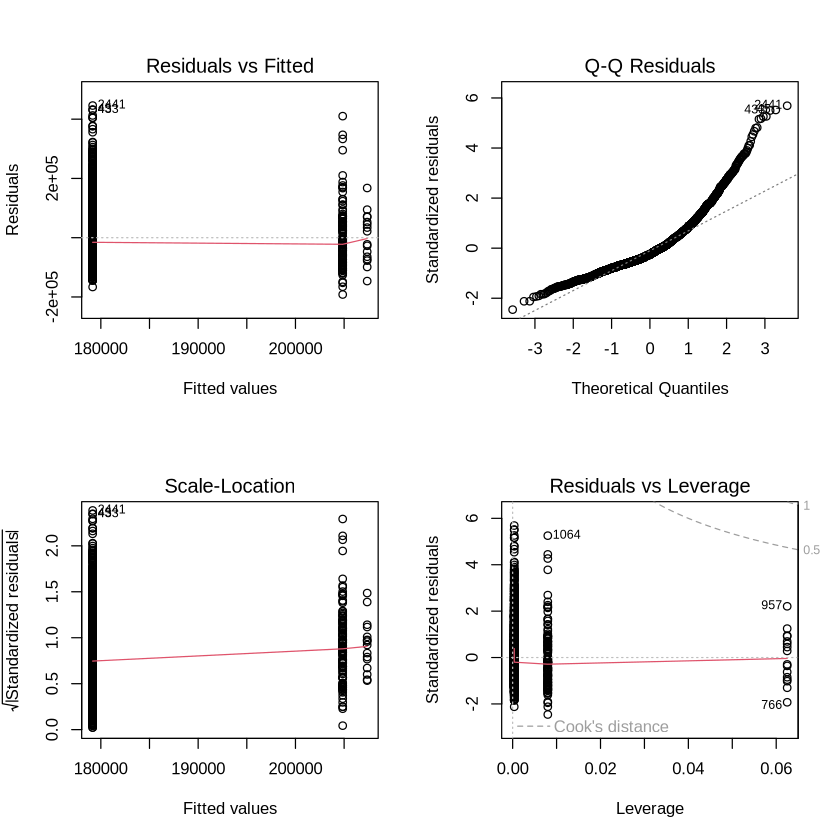

In [3]:
# Linear model 
m2 = lm(Sale_Price~Land_Slope_Descr, ds_ames)
# Check assumptions
par(mfrow=c(2,2))
plot(m2)
print("Interpret the results from the linear model:")
summary(m2)
print("Confidence intervals of the linear model estimates:")
confint(m2)

#### **Assumptions of Linear Regression**

Using the results outputs below, assess each of these assumptions. **Write Severly Violated, Violated, Valid or Irrelevant:**

(3 points each, total 15 points)


1a. Linear relationship, there exists a linear relationship between the variables x and y.
  
Answer:  Violated. Some of the graphs does not look like it have a linear relationship.

1b. Independence of the residuals, observations should be measurements taken from independent observational or experimental units (i.e., true replicas).

  
Answer: Valid. Observations are independent as each observation is a house which is unique and uncorrelated.


1c: Homoscedasticity, the residuals have constant variance at every level of the variable x.

Answer: Valid. There is constant variance at every level of the variable x as seen from the graphs.




1d:  Normality of the residuals, residuals should be approximately normally distributed.


Answer: Violated. The residuals range widely, suggesting potential skewness and may not be normally distributed. 


1e. No influential outliers.

Answer: Violated. Due to the wide range of residuals, there is a possibility of outliers that may affect the results.


#### **Which one is more appropriate, One-Way ANOVA or linear model?**

State and justify your answer.

    
(10 points): 5 points for correctly identifying the appropriate method, 5 points for justifying why the chosen method is most appropriate for addressing the primary statistical problem.


Answer: <br>
* Linear model.
* Despite the violations of some assumptions, it provides a clearer insight into the relationship between Sale_Price and Land_Slope_Descr through the estimated coefficients, which quantify the effect of different slope categories on sale price. On the other hand, One-Way ANOVA primarily tests for differences in group means without providing specific estimates for each category. Additionally, the linear model's ability to include confidence intervals for estimates and the significance of coefficients offers more information for decision-making and interpretation.



### **2. Methodology:** 
(This paragraph will continue to fill the methodology section you began with the EDA in Assignment 1)

1. Write one sentence about the appropriate statistical methods and techniques applied based on the insights you gained in the previous cells.
2. Write a second sentence about the correct specification of the applied method (e.g., which variable is the response, and which is the explanatory variable).
3. Write a third sentence explaining how the results will be interpretable in the context of the statistical problem formulation.


(10 points): 5 points for correctly identifying statistical concepts in the first and second sentences.

(Bonus 10 points): Bonus marks for the third sentence, explaining how the results will be interpreted in the context of the primary statistical problem.

Answer: <br>
* Linear regression was applied as the appropriate statistical method, providing detailed estimates of the effect of different slope categories.
* The response variable is Sale_Price, and the explanatory variable is Land_Slope_Descr.
* The results will be intepreted to see the effect of land slope(mainly gentle slope vs severe slope) on the prices of residential properties.



#### **Data preparation and preprocessing steps.**

Based on your assessments in the previous cells, indicate if any data transformations are necessary for the planned analysis. Explain your reasoning. If no particular transformations are needed, indicate that the data will be used in its raw form.

(13 points)

Answer:<br>
Based on the assessments, a log transformation of the sale price could help stabilize variance and normalize the distribution, improving the accuracy of the estimates. 


### **3. Discussion:** 


(This paragraph will continue to fill the methodology section you began with the EDA in Assignment 1, where you covered limitations due to the study design)

**Limitations and Assumptions of the Chosen Statistical Methods**

Discuss the limitations and assumptions of the chosen statistical methods, including potential violations of these assumptions.

Hint: 

- One sentence on potential limitations arising from violated assumptions.
- One sentence on how Type I Error may get inflated when there are multiple tests.

(10 points): 5 points for the first sentence, and 5 points for the second sentence.

Answer: 
* The primary limitation is the potential violation of assumptions such as normality and the presence of influential outliers, which may lead to biased estimates and reduced reliability of the results.
* Conducting multiple tests without proper adjustments increases the risk of Type I Error, inflating the likelihood of falsely detecting significant effects where none exist.



### **Bonus Marks Task:**

Explore if there are any covariates or confounders in the dataset that may change the effect of `Land Slope` on `Sale Price`. Write code to generate an appropriate graph, fit a linear model, examine diagnostic plots, and once you have the appropriate model, interpret the results.

Hint: Take a look at the graphs in Assignment 1 for clues. Consider any other variable that may influence the effect of `Land Slope` on `Sale Price`.

**Tasks:**
- (5 points) Create an appropriate graph.
- (5 points) Fit a linear model, examine diagnostic plots, and interpret the results.

(Bonus 10 points total)

In [ ]:
# Bonus task code here 


**Upload your work from Assignment 2**

- Each student will upload the Jupiter Notebook on Canvas Course 1: https://canvas.ubc.ca/courses/144703:

 `[Assignment_2]_[student name].ipynb`
eg., `Assignment_2_Biljana_Jonoska_Stojkova.ipynb`

- Please write at the title who was responsible for writing each paragraph. 

Navigate to the Assignments section on Canvas Course 1, and upload the Jupiter document on Canvas under: 
`Assignments\Assignment2` 